In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# CIFAR-10 데이터 세트 불러오기

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

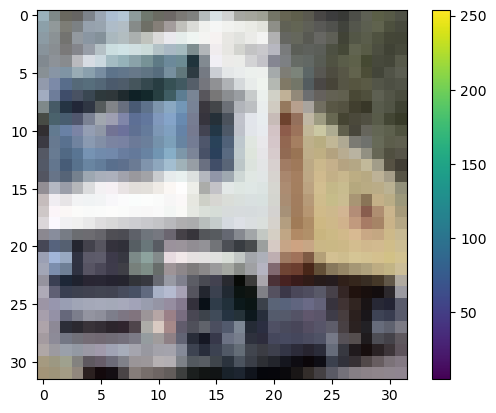

In [2]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

X_train = X_train/255.0
X_test = X_test/255.0

In [3]:
# Sequential model 생성

model = Sequential()
model.add(Conv2D(64, activation='relu', kernel_size=(3,3 )))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, activation='relu', kernel_size=(3,3 )))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [4]:
# model compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model fit
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 37s 33ms/step - loss: 1.5823 - accuracy: 0.4298 - val_loss: 1.3615 - val_accuracy: 0.5239
Epoch 2/10
1094/1094 [==============================] - 34s 31ms/step - loss: 1.2308 - accuracy: 0.5627 - val_loss: 1.2284 - val_accuracy: 0.5699
Epoch 3/10
1094/1094 [==============================] - 35s 32ms/step - loss: 1.0974 - accuracy: 0.6108 - val_loss: 1.1570 - val_accuracy: 0.5947
Epoch 4/10
1094/1094 [==============================] - 43s 39ms/step - loss: 1.0018 - accuracy: 0.6458 - val_loss: 1.1179 - val_accuracy: 0.6092
Epoch 5/10
1094/1094 [==============================] - 48s 44ms/step - loss: 0.9318 - accuracy: 0.6727 - val_loss: 1.0737 - val_accuracy: 0.6299
Epoch 6/10
1094/1094 [==============================] - 40s 37ms/step - loss: 0.8575 - accuracy: 0.6959 - val_loss: 1.0435 - val_accuracy: 0.6402
Epoch 7/10
1094/1094 [==============================] - 31s 29ms/step - loss: 0.7942 - accuracy: 0.7190 - val_loss: 1.0807 -

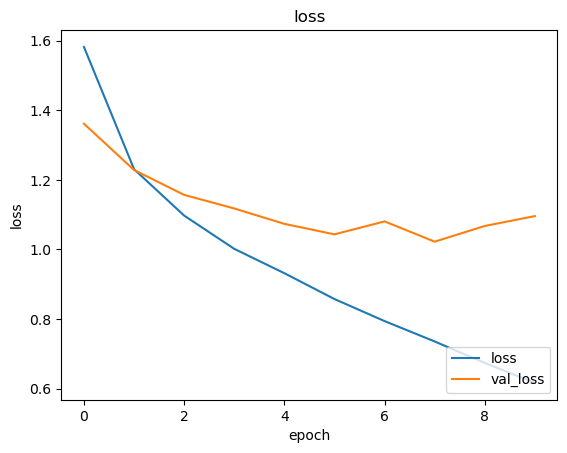

In [5]:
# 손실값 그래프로 나타내기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.show()

313/313 [==============================] - 2s 7ms/step
정답= [8]
예측값= [4.7056351e-04 9.3534186e-02 2.6370830e-07 7.4529612e-06 2.0006053e-06
 3.0144020e-07 3.5457924e-05 4.7448140e-08 9.0582472e-01 1.2509253e-04]


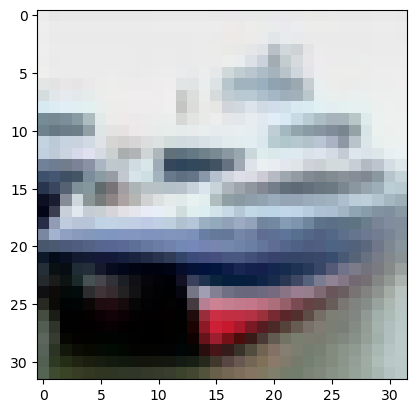

In [6]:
plt.figure()
plt.imshow(X_test[1])
y_pred = model.predict(X_test)
print("정답=", y_test[1])
print("예측값=", y_pred[1])